In [66]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(suppress=True)
import random

In [67]:
def trans_mat(N):
    w=np.ones((N,N), dtype= np.complex64)
    wn= np.exp(-1j*2*np.pi/N)
    row = []
    val=1
    for i in range(N):
        row.append(val)
        val= val*wn
    row= np.array(row)
    #print(row)
    w[1]= row
    newRow= row
    for i in range(N-2):
        newRow= newRow*row
        w[i+2]= newRow
        #print(newRow)
    return w

In [ ]:

#DFT and IDFT


In [68]:
def my_dft(x):
    N= len(x)
    out= np.dot(trans_mat(N), x)
    return out

In [69]:
d= my_dft([1,3,3,1])
d

array([ 8.+0.j, -2.-2.j,  0.+0.j, -2.+2.j])

In [70]:
def my_idft(X):
    K=len(X)
    out= (1/K)*np.matmul(np.conjugate(trans_mat(K)), X)
    return np.absolute(out)

In [71]:
my_idft(d)

array([1., 3., 3., 1.])

In [ ]:

#DCT and IDCT


In [72]:
def my_dct(x):
    N=len(x)
    mat= np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            mat[i][j]= 2*np.cos(np.pi*(2*j+1)*i/(2*N))
    out= np.dot(mat, x)
    return out

In [73]:
x= [1,3,3,1]
c=my_dct(x)
c

array([16.        ,  0.        , -5.65685425, -0.        ])

In [74]:
def my_idct(X):
    K= len(X)
    #print(K)
    mat= np.zeros((K,K), dtype=np.float)
    for i in range(K):
        for j in range(K):
            if(j==0):
                mat[i][j]= (1/(2*K))*np.cos(np.pi*j*(2*i+1)/(2*K))
            else:
                mat[i][j]= (1/(1*K))*np.cos(np.pi*j*(2*i+1)/(2*K))
    out= np.dot(mat, X)
    return out

In [75]:
my_idct(c)

array([1., 3., 3., 1.])

In [ ]:

#Haar Transform and Inverse Haar


In [76]:
def my_haar(x):
    v= (int)(np.log2(len(x)))
    initial= np.array([[1.0]])
    const1= np.array([math.sqrt(0.5),math.sqrt(0.5)])
    const2= np.array([math.sqrt(0.5),-math.sqrt(0.5)])
    for i in range(1,v+1):
        shape= (int)(pow(2,i-1))
        upper= np.kron(initial, const1)
        lower= np.kron(np.identity(shape), const2)
        initial= np.concatenate((upper, lower), axis=0)
        #print(initial)
    #print(initial)
    out= np.dot(initial, x)
    return out

In [77]:
x= [1,3,3,1]
h= my_haar(x)
h

array([ 4.        ,  0.        , -1.41421356,  1.41421356])

In [78]:
def my_ihaar(X):
    v= (int)(np.log2(len(X)))
    initial= np.array([[1.0]])
    const1= np.array([math.sqrt(0.5),math.sqrt(0.5)])
    const2= np.array([math.sqrt(0.5),-math.sqrt(0.5)])
    for i in range(1,v+1):
        shape= (int)(pow(2,i-1))
        upper= np.kron(initial, const1)
        lower= np.kron(np.identity(shape), const2)
        initial= np.concatenate((upper, lower), axis=0)
        #print(initial)
    N= len(X)
    initial= np.transpose(initial)
    out= np.dot(initial, X)
    return out

In [79]:
my_ihaar(h)

array([1., 3., 3., 1.])

In [ ]:

#Energy Compaction


In [80]:
def loss_dft(x, L):
    X_dft= my_dft(x)
    N= len(X_dft)
    low= int((N-L+1)/2)
    high= int((N-1+L)/2)
    for i in range(low, high+1):
        X_dft[i]= 0
    x1= my_idft(X_dft)
    val=np.sum(np.square(x-x1))
    return val/N

In [81]:
def loss_dct(x, L):
    X_dct= my_dct(x)
    N= len(X_dct)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_dct[i]= 0
    x1= my_idct(X_dct)
    #print(x1)
    val=np.sum(np.square(x-x1))
    return val/N

In [82]:
def loss_haar(x, L):
    X_haar= my_haar(x)
    N= len(X_haar)
    low= (int)((N-L))
    high= int((N-1))
    for i in range(low, high+1):
        X_haar[i]= 0
    x1= my_ihaar(X_haar)
    val=np.sum(np.square(x-x1))
    return val/N

In [88]:
x= np.array(random.sample(range(256),256))
dct=[]
dft=[]
haar=[]
for i in range(150, 250):
    dct.append(loss_dct(x, i))
    dft.append(loss_dft(x, i))
    haar.append(loss_haar(x,i))

dct= np.array(dct)
dft= np.array(dft)
haar= np.array(haar)
x

array([ 33,  74, 113,  63, 151, 183,  48, 154, 110, 189,   5, 191, 115,
        89, 158, 188, 118,  50, 164,  25, 195,  44,  38, 194, 116,  97,
       166,  37, 101, 222, 172, 143, 245, 182,  55, 243, 124,  64,  32,
       239, 119,  10, 255,  49,  12, 215, 171,  96, 234,  56, 125,  79,
       137, 232, 206,  81,  11, 224,  19, 167, 220, 145, 213, 237, 149,
       236, 238,  80, 240,  40, 216, 132, 231, 202, 106, 159,  13,  21,
        84, 212, 221,  82,  36, 135,  22, 185, 136,  59, 174, 130, 108,
       141, 203,  93, 100,  91,  57,  18, 204, 200, 117,  53, 176, 128,
        27, 112, 254, 103, 181, 249, 102, 184,  17, 230,  16,  68, 156,
        90,  71,   9, 146, 178, 140, 111, 131,  62, 227,   3, 244, 211,
       105, 173, 205, 190,  47, 197,  58, 150,  31, 201, 193,  95,  34,
       198, 161,  23, 147,  14, 126, 153, 152,  45, 214,  85, 138, 133,
       165,   4,  70,  42, 155,  76, 248, 226, 207,  69,  77, 209, 235,
        39,  66, 148, 134, 109,  61, 252,  99,  54,  86,  51, 22

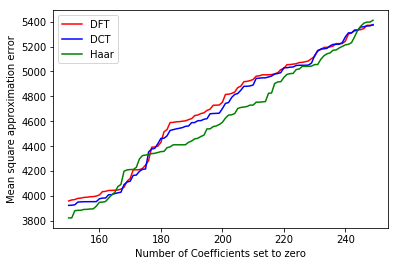

In [89]:
plt.plot(range(150,250),dft, 'r', label="DFT")
plt.plot(range(150, 250),dct, 'b', label="DCT")
plt.plot(range(150, 250),haar, 'g', label= "Haar")
plt.xlabel("Number of Coefficients set to zero")
plt.ylabel("Mean square approximation error")
plt.legend()
plt.show()